# Estimating Regression Fits

## Functions for Drawing Linear Regression Models
- They include the `regplot()` and `lmplot()`

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='total_bill', ylabel='tip'>

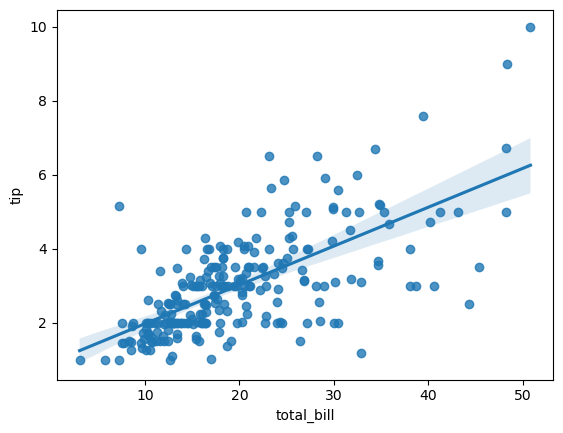

In [4]:
# In both the resulting regression line is with a 95% interval for that regression:
# regplot is an axes-level function.

tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


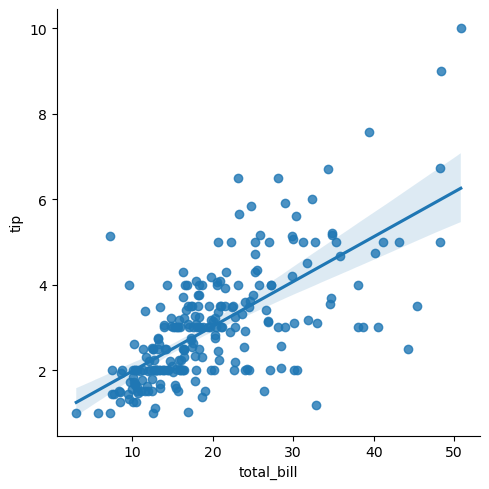

In [6]:
sns.lmplot(x="total_bill", y="tip", data=tips)
# This is a figure level function.

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


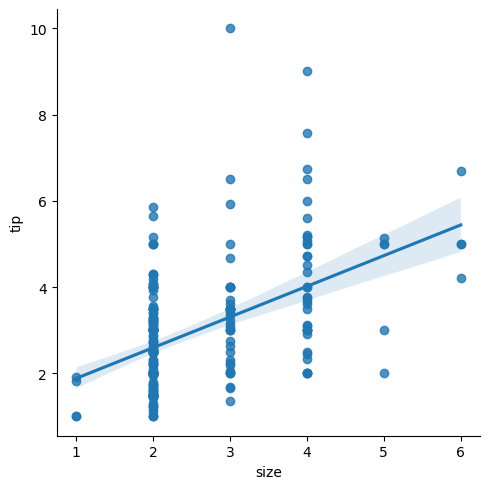

In [7]:
# It is possible to fit a linear regression when one of the variables takes discrete values, however,
# The simple scatterplot produced by this kind of dataset is often not optimal:

sns.lmplot(x="size", y="tip", data=tips)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


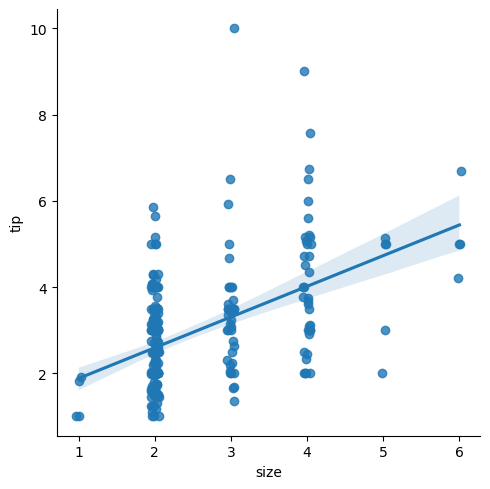

In [9]:
# We can apply some random noise to discrete values to make the distribution of those valyes much more clear.
# Jitter is only applied to the scatterplot data and does not influence the regression line fit itself:

sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


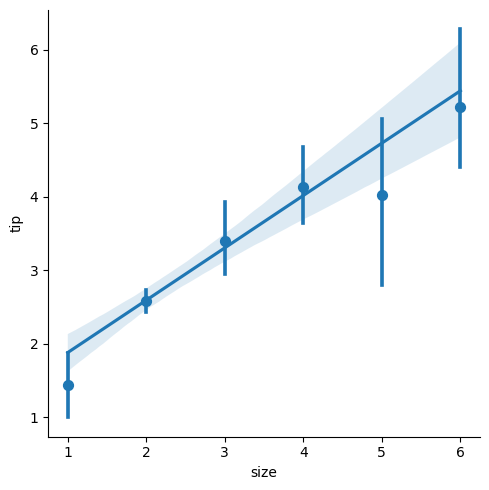

In [10]:
# Another option is to collapse over the observations in each discrete bin to plot an estimate of,
# central tendancy along with a confidence interval:

sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## Fitting Different Kinds of Models

In [11]:
anscombe = sns.load_dataset("anscombe")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


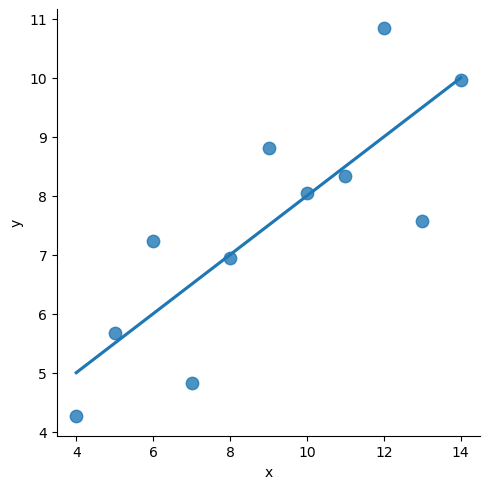

In [12]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
          ci=None, scatter_kws={"s":80})

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


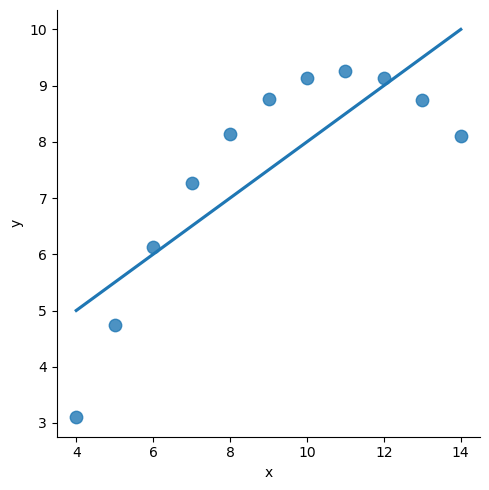

In [13]:
# Linear relationship in the second dataset is the same but the plot clearly shows that this is not a good model,

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
          ci=None, scatter_kws={"s": 80})

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


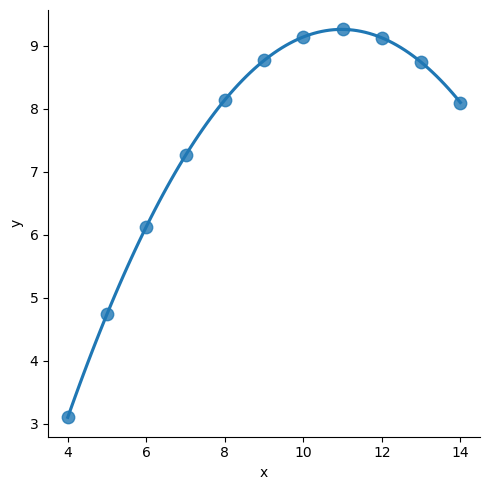

In [14]:
# In the presence of higer-order relationships, lmplot() and regplot() can fit a apolynomial regression model to expore,
# simple kinds of non-linear trends in the dataset:

sns.lmplot(x="x" ,y="y", data=anscombe.query("dataset == 'II'"),
          order=2, ci=None, scatter_kws={"s":80})

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


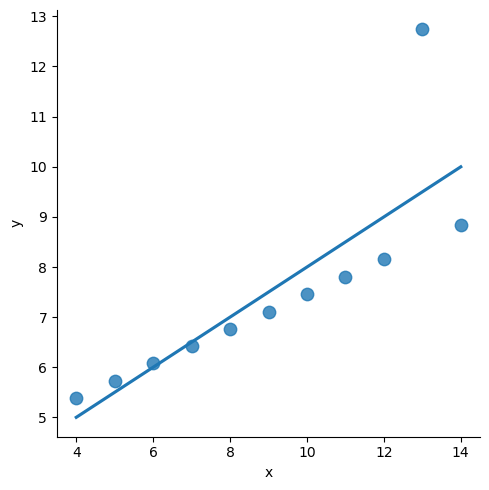

In [15]:
# A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


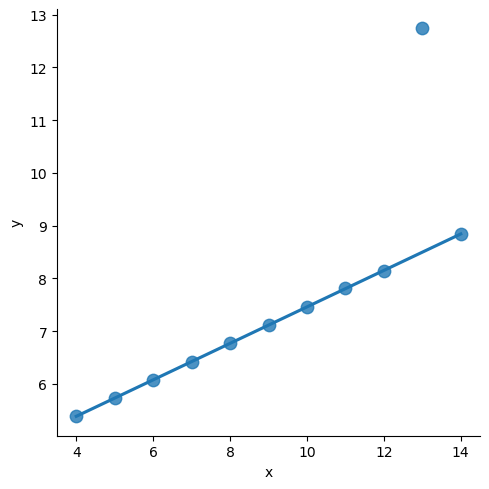

In [17]:
# In the presence of outliers, it can be useful to fit a robut regression, which uses a different loss function to downweight relatively large residuals:

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
          robust=True, ci=None, scatter_kws={"s":80})

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


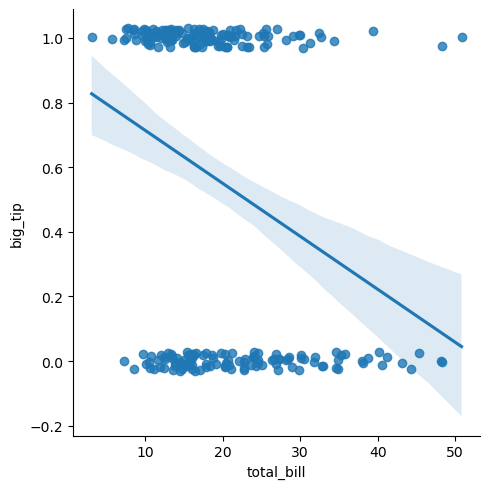

In [18]:
# when the y variable is binary, simple linear regression also 'works' but provides implausible predictions:

tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
          y_jitter=.03)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


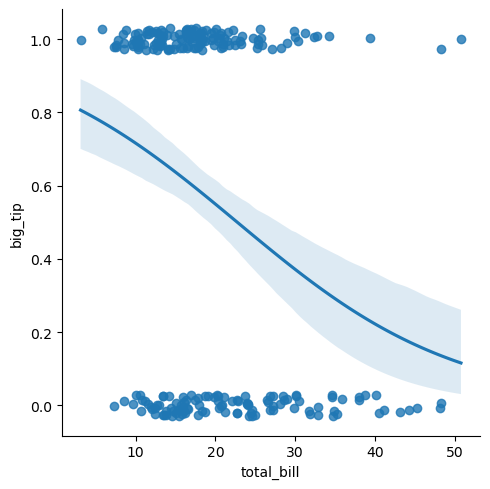

In [20]:
# The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability:

sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


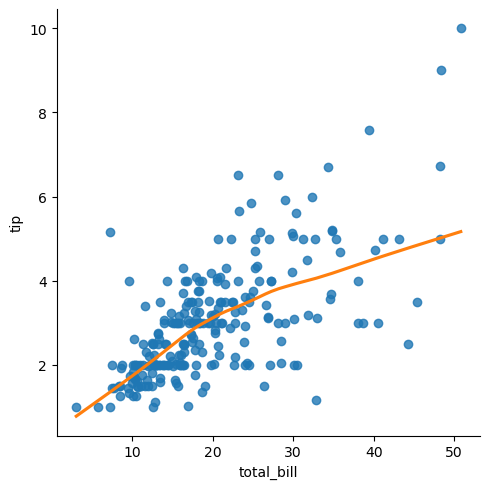

In [21]:
# A different approach is to fit a nonparametric regression using a lowless smoother.
# This approach has fewer assumptions, although it is computationally intensive and so currently confidence intervals,
# are not computed at all:

sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True, line_kws={"color":"C1"})

<Axes: xlabel='x', ylabel='y'>

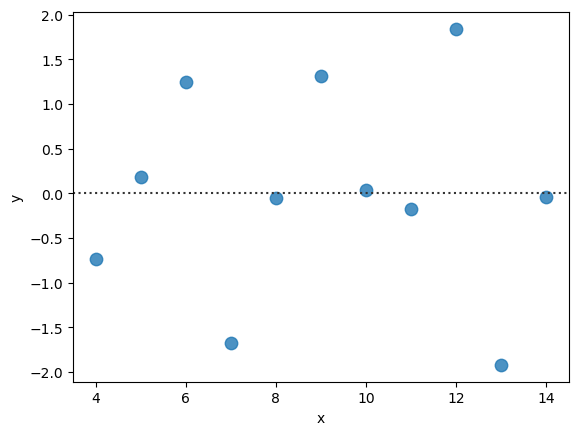

In [22]:
# The residplot() can be useful tool for checking whether the simple regression model is appropriate for a dataset

sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
             scatter_kws={"s":80})

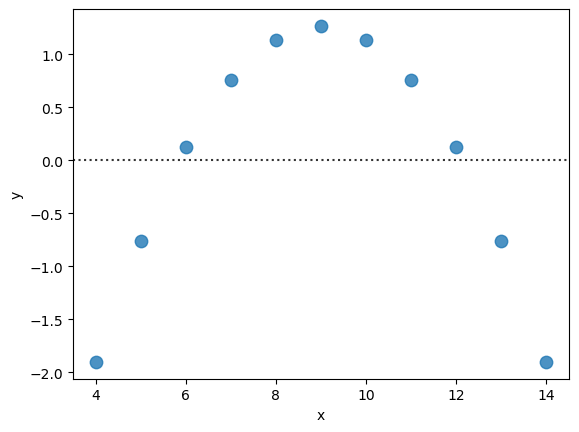

In [24]:
# If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables
- `lmplot()`  combines regplot() with FacetGrid to show multiple fits using `hue` mapping or faceting.

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


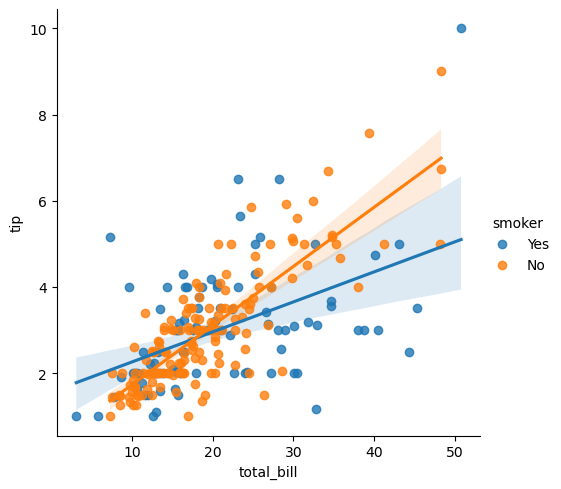

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


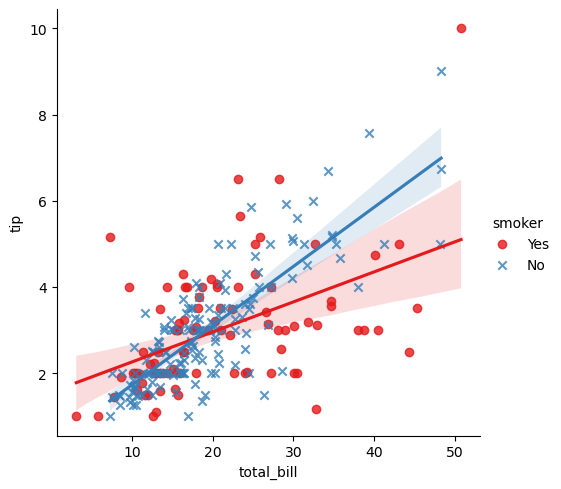

In [26]:
# Unlike relplot(), it is not possible to map a distinct variable to the style properties of the scatterplot,
# but we can redundantly code the hue variable with marker

sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
          markers=["o", "x"], palette="Set1")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


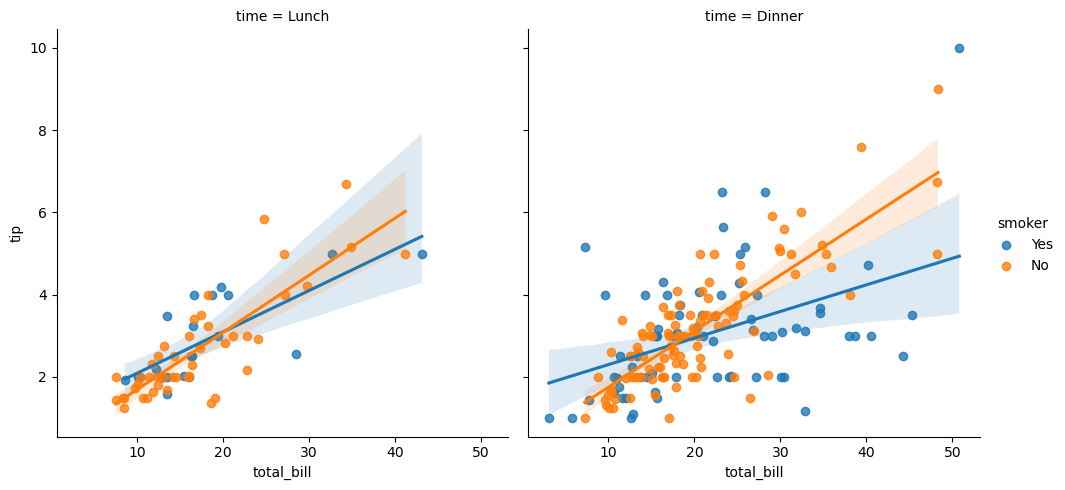

In [27]:
# To add another variable, we can draw multiple "facets" with each level of the variable appearing in the rows or columns of the grid:

sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


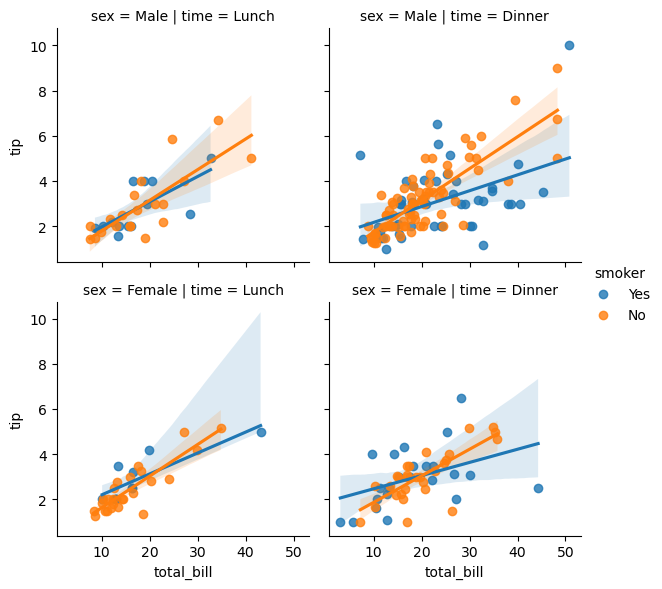

In [29]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips, height=3)

## Plotting a Regression in other Contexts

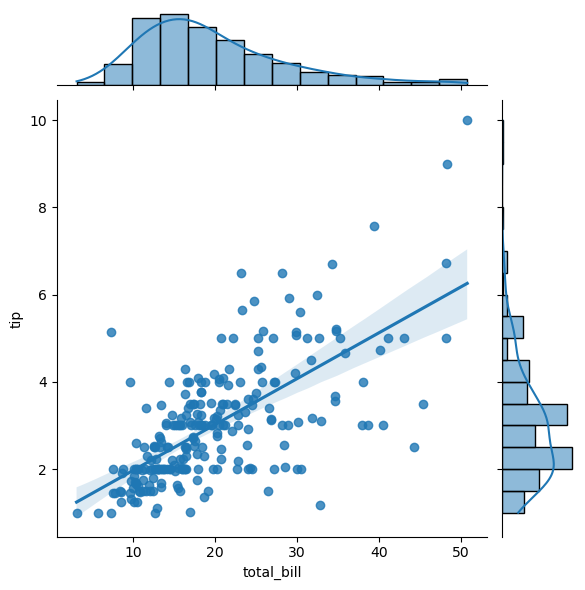

In [30]:
# In addition to the plot styles previously discussed 'jointplot()' can use regpplot() to show the linear regression,
# fit on the joint axes by passing `kind="reg"`

sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


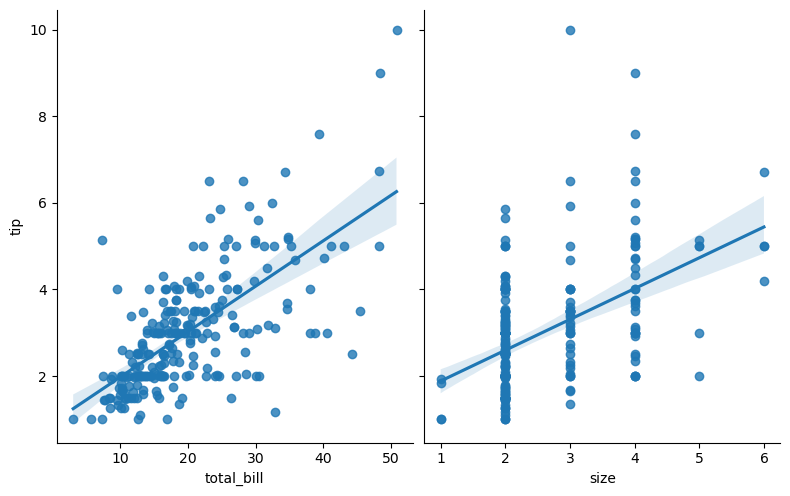

In [31]:
# Using the pairplot() function with kind="reg" combines regplot() and pairGrid to show the linear relationship between,
# variables in a dataset, take note how this is different from lmplot()

sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
            height=5, aspect=.8, kind="reg")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


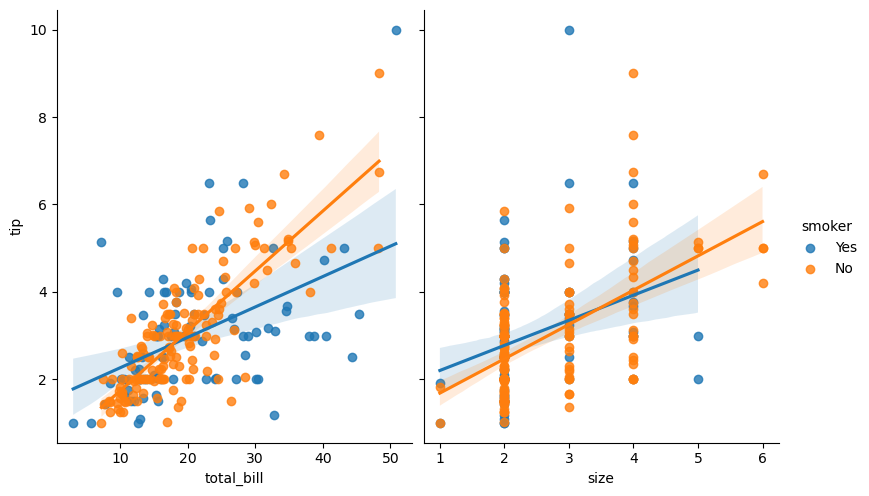

In [32]:
# Conditioning on an additional categorical variable is built into both of these fnctions using the 'hue' parameter:

sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
            hue="smoker", height=5, aspect=.8, kind="reg")